# TensorFlow: Evaluating & Prediction

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets 

# Build Model

In [2]:
input_shape = (28, 28, 1)
num_classes = 10

learning_rate = 0.001

In [3]:
inputs = layers.Input(input_shape)
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

###############################################

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [4]:
# Model is the full model w/o custom layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Preprocess

데이터셋 불러오기 

In [5]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [6]:
train_x = train_x[..., tf.newaxis]
test_x = test_x[..., tf.newaxis]

train_x = train_x / 255.
test_x = test_x / 255.

# Training

In [7]:
num_epochs = 1
batch_size = 64

In [8]:
hist = model.fit(train_x, train_y, 
                 batch_size=batch_size, 
                 shuffle=True)

W0815 17:20:37.845820 28200 deprecation.py:323] From C:\Users\June\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
60000/60000 [==============================] - 126s 2ms/sample - loss: 0.2166 - accuracy: 0.9310


In [25]:
hist.history

{'loss': [0.21658981240888436], 'accuracy': [0.931]}

# Evaluating  
- 학습한 모델 확인

In [26]:
model.evaluate(test_x, test_y, batch_size=batch_size)

10000/10000 [==============================] - 5s 464us/sample - loss: 0.0414 - accuracy: 0.9852 - loss: 0.0417 - accuracy: 0.98


[0.04140934086308116, 0.9852]

### 결과 확인

Input으로 들어갈 이미지 데이터 확인

In [27]:
import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

In [28]:
test_image = test_x[0, :, :, 0]
test_image.shape

(28, 28)

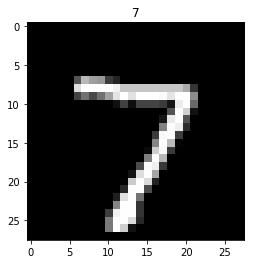

In [31]:
plt.title(test_y[0])
plt.imshow(test_image, 'gray')
plt.show()

- 모델에 Input Data로 확인 할 이미지 데이터 넣기

In [33]:
test_image.shape

(28, 28)

In [34]:
pred = model.predict(test_image.reshape(1, 28, 28, 1))

In [35]:
pred.shape

(1, 10)

In [ ]:
0 0 0 0 0 0 0 0 0 0 

In [38]:
pred

array([[2.3073243e-10, 9.2074112e-11, 7.0907742e-09, 1.2896388e-07,
        3.2837595e-12, 5.2636447e-11, 2.3298190e-15, 9.9999976e-01,
        3.0384487e-11, 9.1369053e-08]], dtype=float32)

- np.argmax

In [37]:
np.argmax(pred)

7

## Test Batch

Batch로 Test Dataset 넣기

In [39]:
test_batch = test_x[:32]
test_batch.shape

(32, 28, 28, 1)

Batch Test Dataset 모델에 넣기

In [43]:
preds = model.predict(test_batch)
preds.shape

(32, 10)

- 결과 확인

In [47]:
np.argmax(preds, -1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1], dtype=int64)

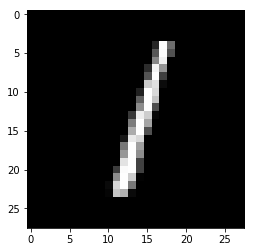

In [50]:
plt.imshow(test_batch[2, :, :, 0], 'gray')
plt.show()